In [1]:
import sys
sys.path.append('googlereviewscraper')
# Assuming you've defined DriverInit and 
# ReviewScraper in .py files in the same directory as your notebook



In [2]:
from googlereviewscraper.driver_init import DriverInit
from googlereviewscraper.review_scraper import ReviewScraper

In [ ]:
driver_init.close_browser()

In [3]:
url = 'https://www.google.com/search?rlz=1C1GCEA_enHR1085HR1085&q=Casablanca%20Reviews&rflfq=1&num=20&stick=H4sIAAAAAAAAAONgkxI2sTQzMjUzsDC2NDUzMTMzN7W03MDI-IpRyDmxODEpJzEvOVEhKLUsM7W8eBErFkEAULFNy0QAAAA&rldimm=4962560839564667599&tbm=lcl&hl=en&sa=X&ved=0CAYQ5foLahcKEwiAzYbJzIKEAxUAAAAAHQAAAAAQCg&biw=1536&bih=729&dpr=1.25#lkt=LocalPoiReviews&arid=ChZDSUhNMG9nS0VJQ0FnSURSNWJlRUhnEAE'

In [4]:
driver_init = DriverInit()
driver_init.navigate_to_url(url)

In [5]:
driver_init.navigate_to_reviews_tab()

In [6]:
%%sql


Exception: Data Source is not selected

In [6]:
review_scraper = ReviewScraper(driver_init)

In [7]:
review_scraper.load_reviews()

278 reviews found.


In [9]:
review_scraper.click_translate_buttons()

In [10]:
review_scraper.click_more_buttons()

In [12]:
review_scraper.collect_reviews()

No more reviews found. Ending collection.
No more reviews found. Ending collection.
No more reviews found. Ending collection.
No more reviews found. Ending collection.
No more reviews found. Ending collection.
No more reviews found. Ending collection.
No more reviews found. Ending collection.
No more reviews found. Ending collection.
No more reviews found. Ending collection.
No more reviews found. Ending collection.


In [14]:
review_scraper.save_reviews_to_csv(filename='reviews_and_ratings.csv')

Saved reviews to reviews_and_ratings.csv


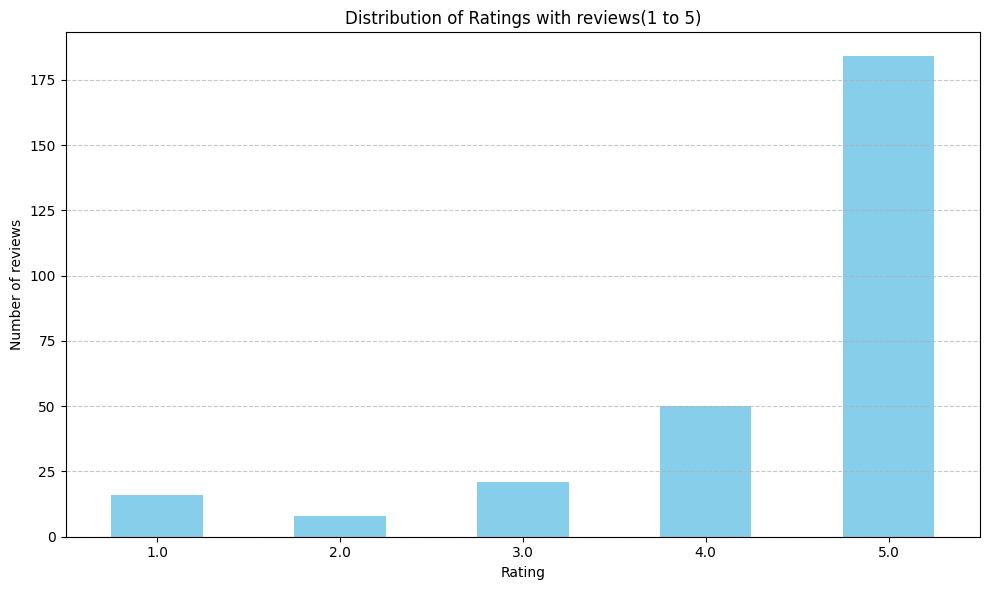

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the reviews and ratings from the CSV file
df = pd.read_csv('reviews_and_ratings.csv')

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
df['Rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings with reviews(1 to 5)')
plt.xlabel('Rating')
plt.ylabel('Number of reviews')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for better readability
plt.tight_layout()  # Adjust the layout to make room for the x-axis labels

# Display the plot
plt.show()

In [18]:
# Calculate the average and standard deviation of the ratings
average_rating = df['Rating'].mean()
std_rating = df['Rating'].std()

# Print the average and standard deviation
print(f"Average Rating: {average_rating:.2f}")
print(f"Standard Deviation of Rating: {std_rating:.2f}")

Average Rating: 4.35
Standard Deviation of Rating: 1.12
